In [121]:
# Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.model_selection import train_test_split     # data separation
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix      # confusion_matrix

from sklearn import metrics 

#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Algorithm model

from sklearn.linear_model import LogisticRegression      # Loggistic Regression

from sklearn.naive_bayes import ComplementNB             # Naive Bayes

from sklearn.neighbors import KNeighborsClassifier       # Algorithm KNN

from sklearn import preprocessing                        # Normalize

# warning

import warnings

In [122]:
warnings.simplefilter(action = 'ignore')

In [123]:
data = pd.read_csv("C:\\Users\\Santosh\\Documents\\Data Science Practice\\Bank Data\\BankData.csv")

In [124]:
data

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [125]:
data.head(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [126]:
data.shape

(5000, 14)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [128]:
data.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [129]:
data.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [130]:
data.isna().count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [131]:
is_null = data.isnull().sum().to_frame(name = "is_null").T
is_na = data.isna().sum().to_frame(name = "is_na").T
unique = data.nunique().to_frame(name = "is_unique").T
new_frame = pd.concat([unique, is_na, is_null])

In [132]:
new_frame

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
is_unique  5000   45          47     162       467       4    108          3   
is_na         0    0           0       0         0       0      0          0   
is_null       0    0           0       0         0       0      0          0   

           Mortgage  Personal Loan  Securities Account  CD Account  Online  \
is_unique       347              2                   2           2       2   
is_na             0              0                   0           0       0   
is_null           0              0                   0           0       0   

           CreditCard  
is_unique           2  
is_na               0  
is_null             0

In [133]:
data.Experience.min()

-3

In [134]:
np.sum(data['Experience']<0)

52

In [135]:
data['Experience'] = abs(data['Experience'])

In [136]:
np.sum(data['Experience']<0)

0

In [137]:
data.CCAvg

0       1.6
1       1.5
2       1.0
3       2.7
4       1.0
       ... 
4995    1.9
4996    0.4
4997    0.3
4998    0.5
4999    0.8
Name: CCAvg, Length: 5000, dtype: float64

In [138]:
np.sum(data['Mortgage']==0)

3462

In [139]:
df = pd.DataFrame(data)

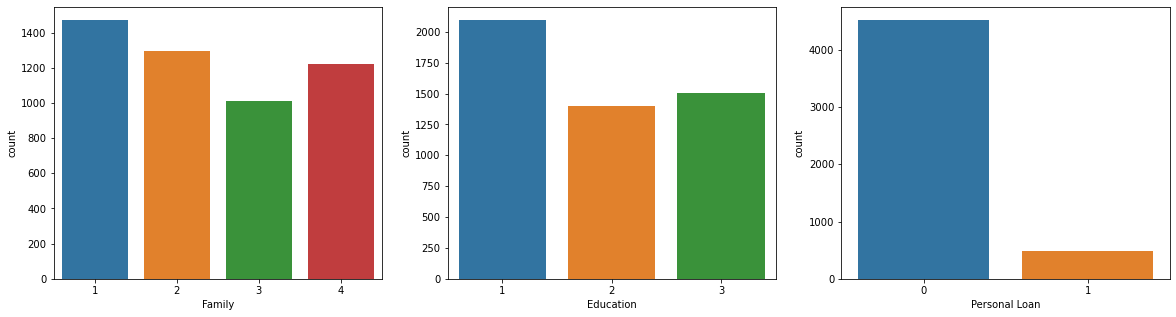

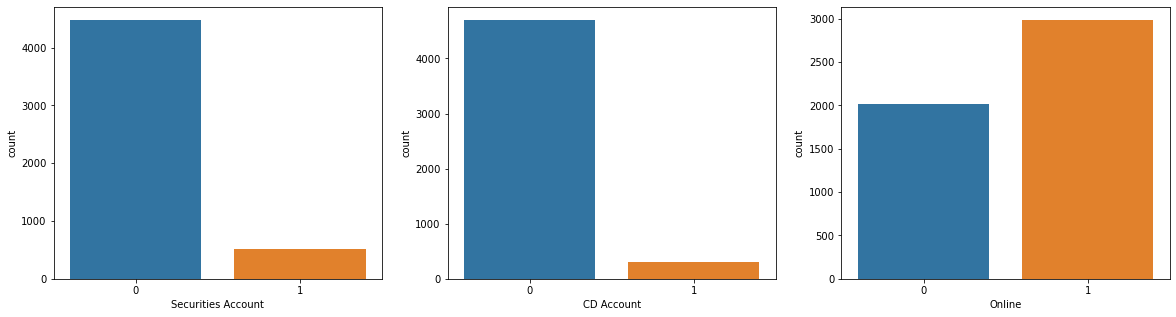

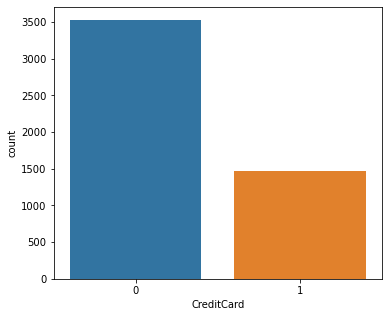

In [140]:
# countplot for categorical columns

Categorical = ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
i = 0
while i<7 :
   
    fig = plt.figure(figsize = [20,5])
    
    plt.subplot(1,3,1)
    sns.countplot(x = Categorical[i] , data = data)
    i += 1
 
    if i==7:
        break
        
    plt.subplot(1,3,2)
    sns.countplot(x = Categorical[i] , data = data)
    i += 1
    
    plt.subplot(1,3,3)
    sns.countplot(x = Categorical[i] , data = data)
    i += 1
    
    plt.show()

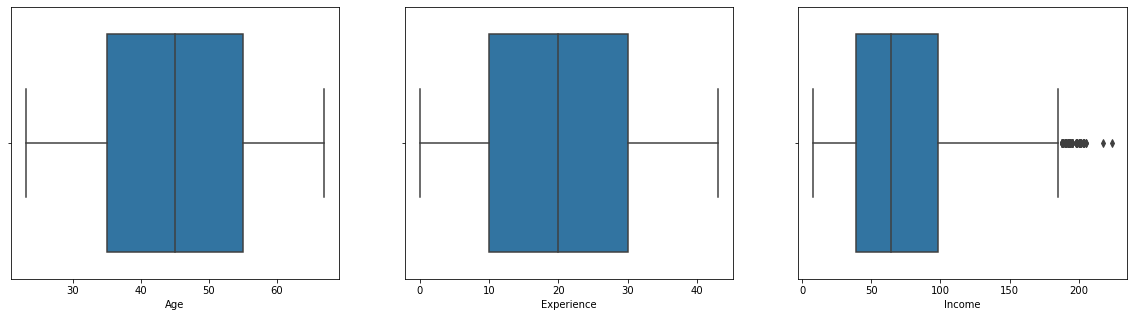

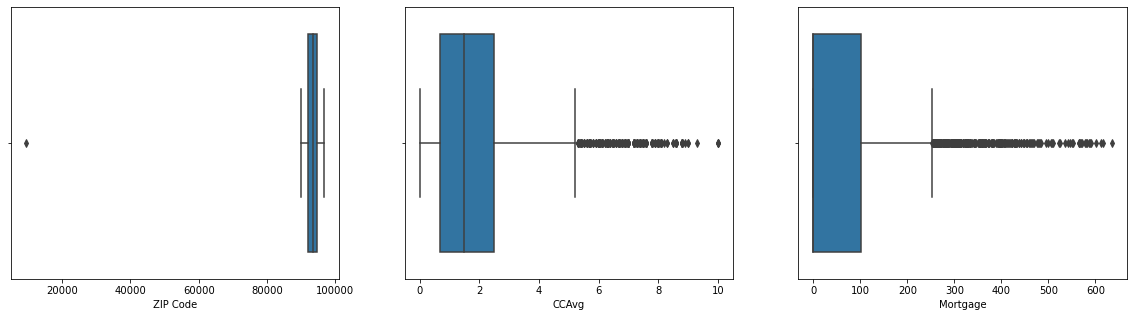

In [141]:
# boxplot for continuous columns

continuous = [ 'Age' , 'Experience' , 'Income' , 'ZIP Code' , 'CCAvg' , 'Mortgage']
i = 0
while i<6 :
    
    fig = plt.figure(figsize = [20,5])
    
    plt.subplot(1,3,1)
    sns.boxplot(x = continuous[i] , data = data)
    i += 1
    
    plt.subplot(1,3,2)
    sns.boxplot(x = continuous[i] , data = data)
    i += 1
    
    plt.subplot(1,3,3)
    sns.boxplot(x = continuous[i] , data = data)
    i += 1
    
    plt.show()

In [142]:
# CCAvg according to the year

df['CCAvg'] = df['CCAvg']*12
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4   19.2          1   
1        2   45          19      34     90089       3   18.0          1   
2        3   39          15      11     94720       1   12.0          1   
3        4   35           9     100     94112       1   32.4          2   
4        5   35           8      45     91330       4   12.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1   22.8          3   
4996  4997   30           4      15     92037       4    4.8          1   
4997  4998   63          39      24     93023       2    3.6          3   
4998  4999   65          40      49     90034       3    6.0          2   
4999  5000   28           4      83     92612       3    9.6          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [143]:
# noise in zip code

np.sum(data['ZIP Code']<20000)

1

In [144]:
noise = data[data['ZIP Code']<20000]
noise

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51          25      21      9307       4    7.2          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384         0              0                   0           0       1   

     CreditCard  
384           1

In [145]:
# calculation corrlation

df.corr()

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008202 -0.017695  0.013432   
Age                -0.008473  1.000000    0.993991 -0.055269 -0.029216   
Experience         -0.008202  0.993991    1.000000 -0.046876 -0.028936   
Income             -0.017695 -0.055269   -0.046876  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028936 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.051851 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.049738  0.645984 -0.004061   
Education           0.021463  0.041334    0.013919 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.011097  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.008304  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.000989 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.009735  0.169738  0.019972   
Online             -0.002528  0.013702    0.014051  0.014206  0.016990   
CreditCard          0.017028  0.007681    0.008851 -0.002385  0.007691   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.051851 -0.049738   0.013919 -0.011097      -0.008304   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIP Code            0.011778 -0.004061  -0.017377  0.007383       0.000107   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.000989    0.009735  0.014051    0.008851  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

Text(0.5, 1.0, 'Correlation Heatmap')

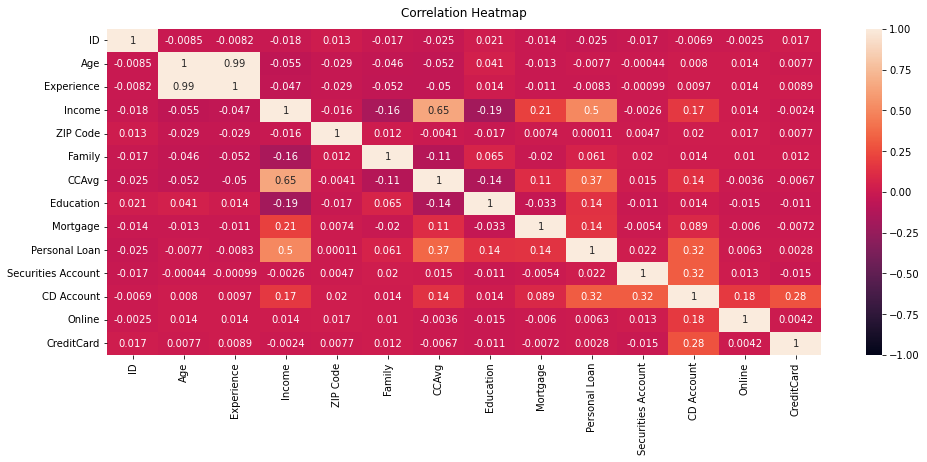

In [146]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [147]:
DF = df.drop(['ID','ZIP Code'], axis =1 , inplace=True)

In [148]:
x = df.drop('Personal Loan' , axis = 1)
y = df["Personal Loan"]

In [149]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1)

In [150]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train.ravel())
y_pred = logreg.predict(x_test)

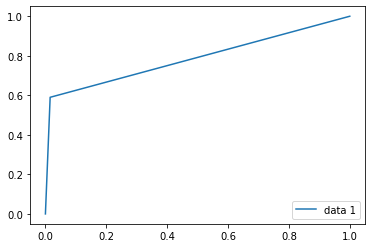

In [151]:
# plot

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr,label = "data 1")
plt.legend(loc = 4)
plt.show()

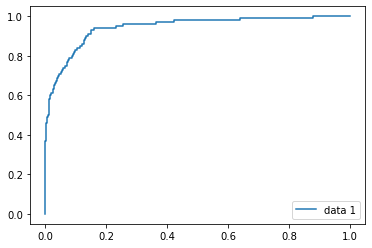

In [152]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()


In [153]:
# confusion_matrix

confusion_matrix(y_test, y_pred)

array([[886,  14],
       [ 41,  59]], dtype=int64)

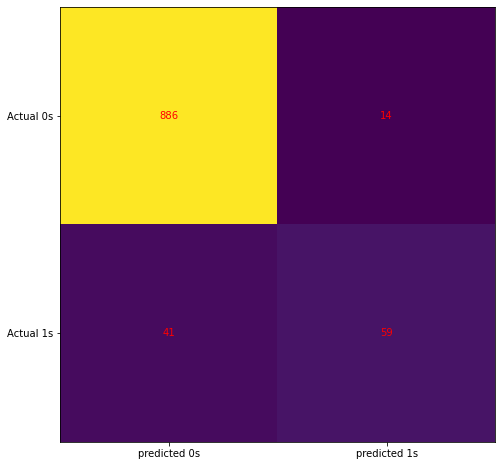

In [154]:
# confusion matrix


cm = confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s' , 'predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s' , 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i , cm[i,j] , ha='center' , va='center' , color ='red')
plt.show()

In [155]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.945


In [156]:
print('f1 score is:', metrics.f1_score(y_test, y_pred))

f1 score is: 0.6820809248554913


In [157]:
# Evaluations

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       900
           1       0.81      0.59      0.68       100

    accuracy                           0.94      1000
   macro avg       0.88      0.79      0.83      1000
weighted avg       0.94      0.94      0.94      1000



In [158]:
x = df.drop('Personal Loan' , axis = 1)
y = df["Personal Loan"]

In [159]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1)

In [160]:
Complement = ComplementNB()
Complement.fit(x_train,y_train.ravel())
y_pred = Complement.predict(x_test)

In [161]:
# confusion_matrix

confusion_matrix(y_test, y_pred)

array([[660, 240],
       [ 30,  70]], dtype=int64)

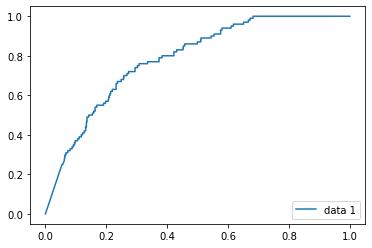

In [162]:
y_pred_proba = Complement.predict_proba(x_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

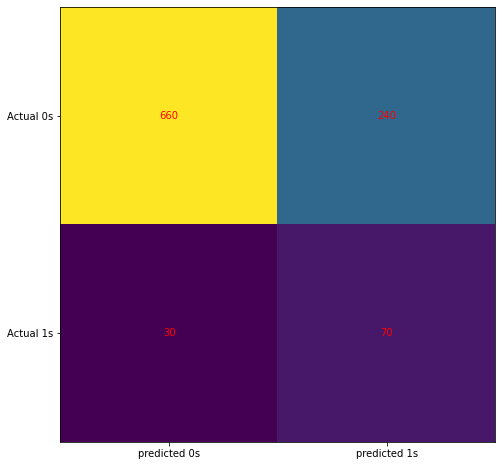

In [163]:
# confusion matrix


cm = confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s' , 'predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s' , 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i , cm[i,j] , ha='center' , va='center' , color ='red')
plt.show()

In [164]:
print('accuracy is:',metrics.accuracy_score(y_test, y_pred))

accuracy is: 0.73


In [165]:
print('f1 score is:', metrics.f1_score(y_test, y_pred))

f1 score is: 0.3414634146341463


In [166]:
# Evaluations

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       900
           1       0.23      0.70      0.34       100

    accuracy                           0.73      1000
   macro avg       0.59      0.72      0.59      1000
weighted avg       0.88      0.73      0.78      1000



In [167]:
x = df.drop('Personal Loan' , axis = 1)
y = df["Personal Loan"]

In [168]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1)

In [169]:
K = 20

# creat matrix of zeros with k dimention
Acc = np.zeros((K))
for i in range(1,K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train,y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test,y_pred)
    
Acc  

array([0.924, 0.915, 0.918, 0.916, 0.916, 0.924, 0.913, 0.917, 0.912,
       0.915, 0.91 , 0.911, 0.907, 0.906, 0.903, 0.905, 0.905, 0.904,
       0.902, 0.902])

In [170]:
# lowest and highest score

print(np.max(Acc))    # k = 1
print(np.min(Acc))    # k = 19

0.924
0.902


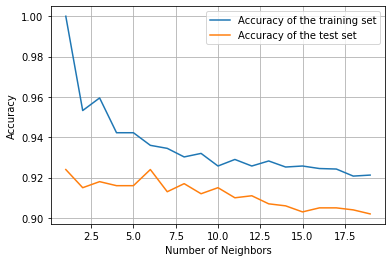

In [171]:
# plot

training_acc = []
test_acc = []
neighbors_setting = range(1,20)
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train,y_train.ravel())
    training_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))

plt.plot(neighbors_setting ,training_acc , label = "Accuracy of the training set" )
plt.plot(neighbors_setting ,test_acc , label = "Accuracy of the test set" )
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()